In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [44]:
%matplotlib inline
sns.set(rc = {'figure.figsize':(15, 10)})
sns.set_style("darkgrid")

In [3]:
DATA_PATH = 'data/'

In [10]:
time_df = pd.read_csv(os.path.join(DATA_PATH, 'data.csv'), header=None)
time_df.columns = ['a_star', 'bnb', 'dijsktra', 'file_name']
time_df.head()

,a_star,bnb,dijsktra,file_name
0,8.217664,17.710804,18.965972,maze_1/maze_0.csv
1,14.859945,15.849272,21.341148,maze_1/maze_1.csv
2,14.801290,20.250503,17.036702,maze_1/maze_2.csv
3,16.570169,18.979078,21.118979,maze_1/maze_3.csv
4,10.112258,9.787547,17.648709,maze_1/maze_4.csv


In [69]:
a_star_time = time_df['a_star']
bnb_time = time_df['bnb']
dijsktra_time = time_df['dijsktra']

a_star_time_mean = a_star_time.mean()
a_star_time_std = a_star_time.std()
bnb_time_mean = bnb_time.mean()
bnb_time_std = bnb_time.std()
dijsktra_time_mean = dijsktra_time.mean()
dijsktra_time_std = dijsktra_time.std()

In [68]:
a_star_time_mean, bnb_time_mean, dijsktra_time_mean

(13.879756878755375, 15.31602580657225, 19.108500688013905)

In [70]:
a_star_time_std, bnb_time_std, dijsktra_time_std

(4.1109577198854765, 4.073930541512464, 2.78779286303449)

In [17]:
a_star = pd.DataFrame({'time': a_star_time})
bnb = pd.DataFrame({'time': bnb_time})
dijsktra = pd.DataFrame({'time': dijsktra_time})

In [73]:
mean_time_df = pd.DataFrame({'mean_time': [a_star_time_mean, bnb_time_mean, dijsktra_time_mean], 'type': ['A*', 'BnB', 'Dijsktra']})
mean_time_df

,mean_time,type
0,13.879757,A*
1,15.316026,BnB
2,19.108501,Dijsktra


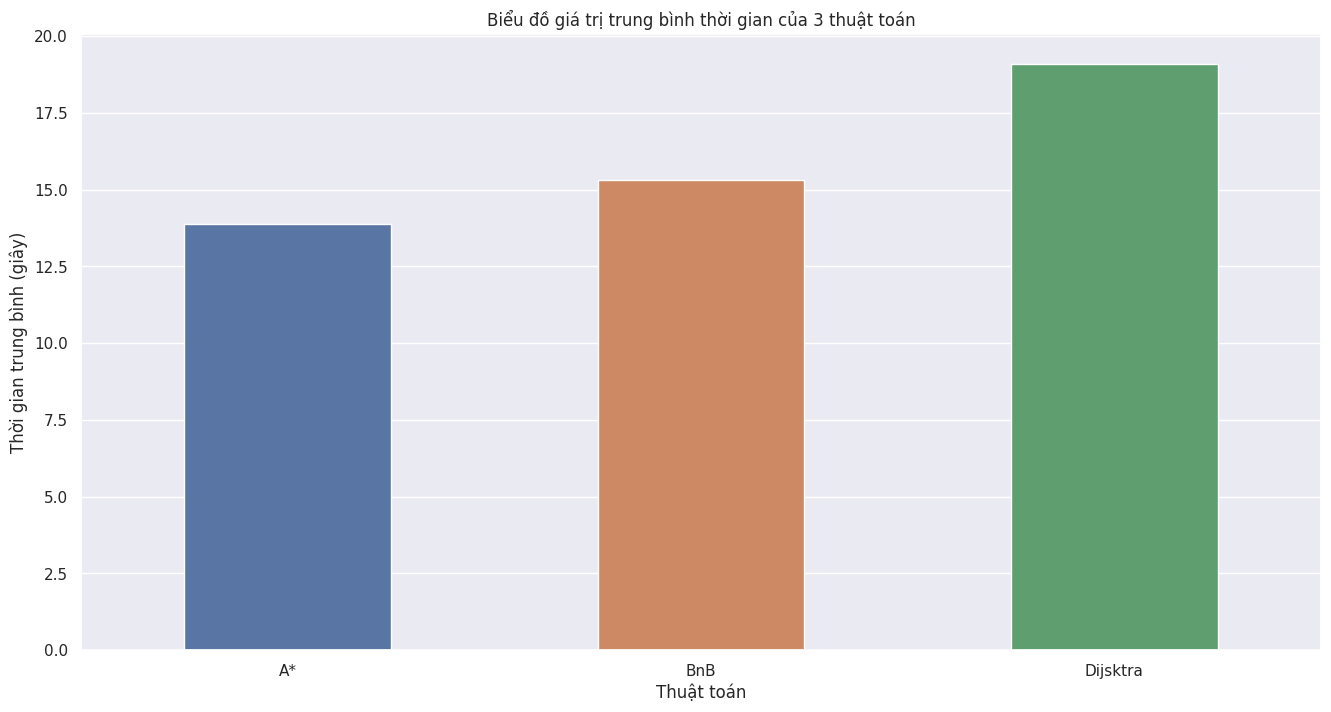

In [80]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(mean_time_df, x="type", y='mean_time', hue="type", fill=True, ax=ax, width=0.5)
plt.title("Biểu đồ giá trị trung bình thời gian của 3 thuật toán")
plt.xlabel("Thuật toán")
plt.ylabel("Thời gian trung bình (giây)")
plt.show()

In [19]:
a_star['type'] = 'A*'
bnb['type'] = 'Branch-and-Bound'
dijsktra['type'] = 'Dijkstra'

In [20]:
a_star.head()

,time,type
0,8.217664,A*
1,14.859945,A*
2,14.801290,A*
3,16.570169,A*
4,10.112258,A*


In [23]:
time_df_to_visualize = pd.concat([a_star, bnb, dijsktra], axis=0, ignore_index=True)

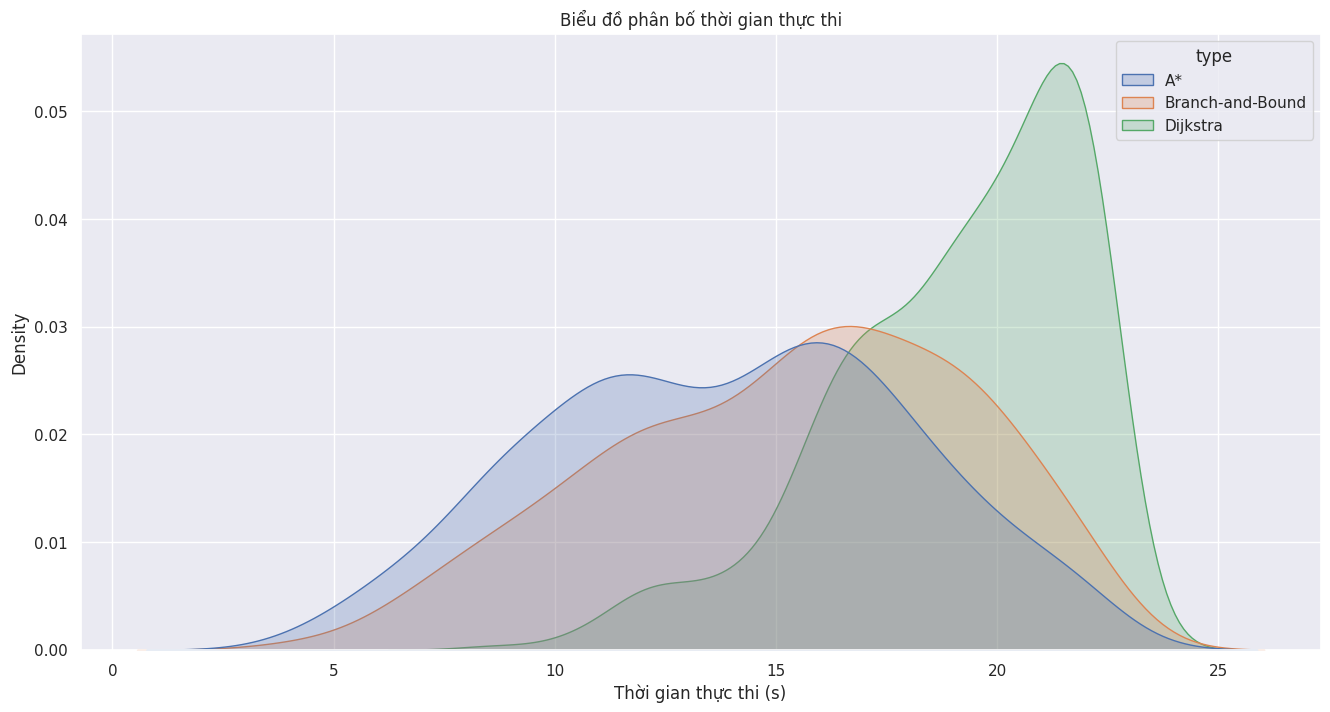

In [67]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.kdeplot(time_df_to_visualize, x="time", hue="type", fill=True, ax=ax)
plt.title("Biểu đồ phân bố thời gian thực thi")
plt.xlabel("Thời gian thực thi (s)")
plt.show()